In [58]:
import numpy as np
import pandas as pd 
from sklearn.datasets import make_moons
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN,KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
data,out = make_moons(n_samples=500,noise=0.07,random_state=42)
scaler = StandardScaler()
data = scaler.fit_transform(data)
df = pd.DataFrame({"x1":data[:,0],"x2":data[:,1],"label":out})
df.head()


,x1,x2,label
0,0.372343,-1.365143,1
1,0.268687,1.143418,0
2,0.605222,-1.478810,1
3,-0.918213,1.420379,0
4,-0.227516,1.678250,0


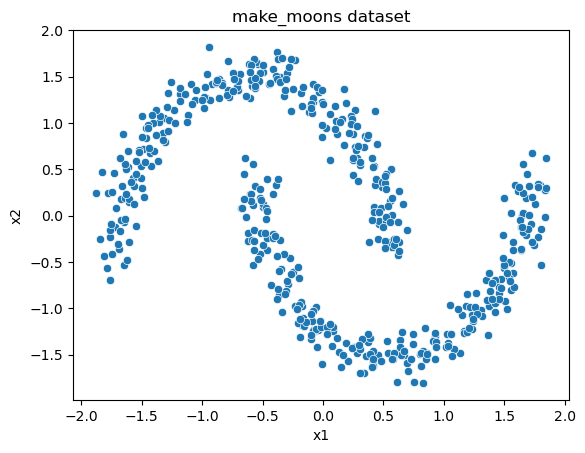

In [54]:
sns.scatterplot(df,x='x1',y='x2')
plt.title("make_moons dataset")
plt.show()

In [55]:
db_model = DBSCAN(eps=0.3,min_samples=2)
db_model.fit(df[['x1','x2']])
df['cluster'] = db_model.labels_
df.head()

,x1,x2,label,cluster
0,0.372343,-1.365143,1,0
1,0.268687,1.143418,0,1
2,0.605222,-1.478810,1,0
3,-0.918213,1.420379,0,1
4,-0.227516,1.678250,0,1


In [56]:
df.cluster.value_counts()

cluster
0    250
1    250
Name: count, dtype: int64

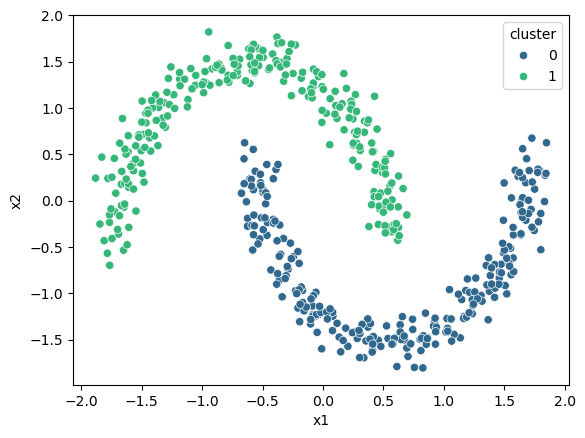

In [57]:
sns.scatterplot(df,x='x1',y='x2',palette='viridis',hue='cluster')
plt.show()

In [59]:
KModel = KMeans(n_clusters=2,init='random')
KModel.fit(df[['x1','x2']])
df['kcluster'] = KModel.labels_
df.head()

c:\Users\shibi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,x1,x2,label,cluster,kcluster
0,0.372343,-1.365143,1,0,0
1,0.268687,1.143418,0,1,1
2,0.605222,-1.478810,1,0,0
3,-0.918213,1.420379,0,1,1
4,-0.227516,1.678250,0,1,1


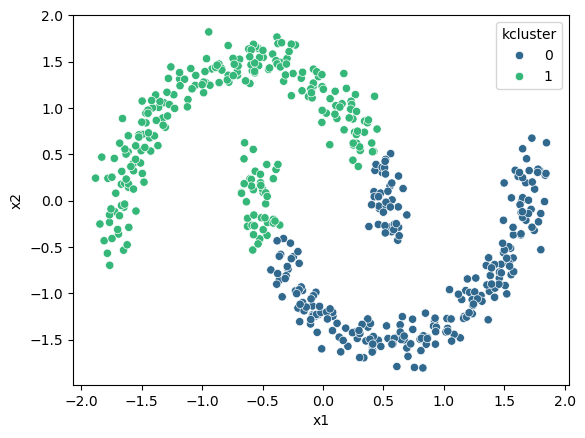

In [60]:
sns.scatterplot(df,x='x1',y='x2',palette='viridis',hue='kcluster')
plt.show()